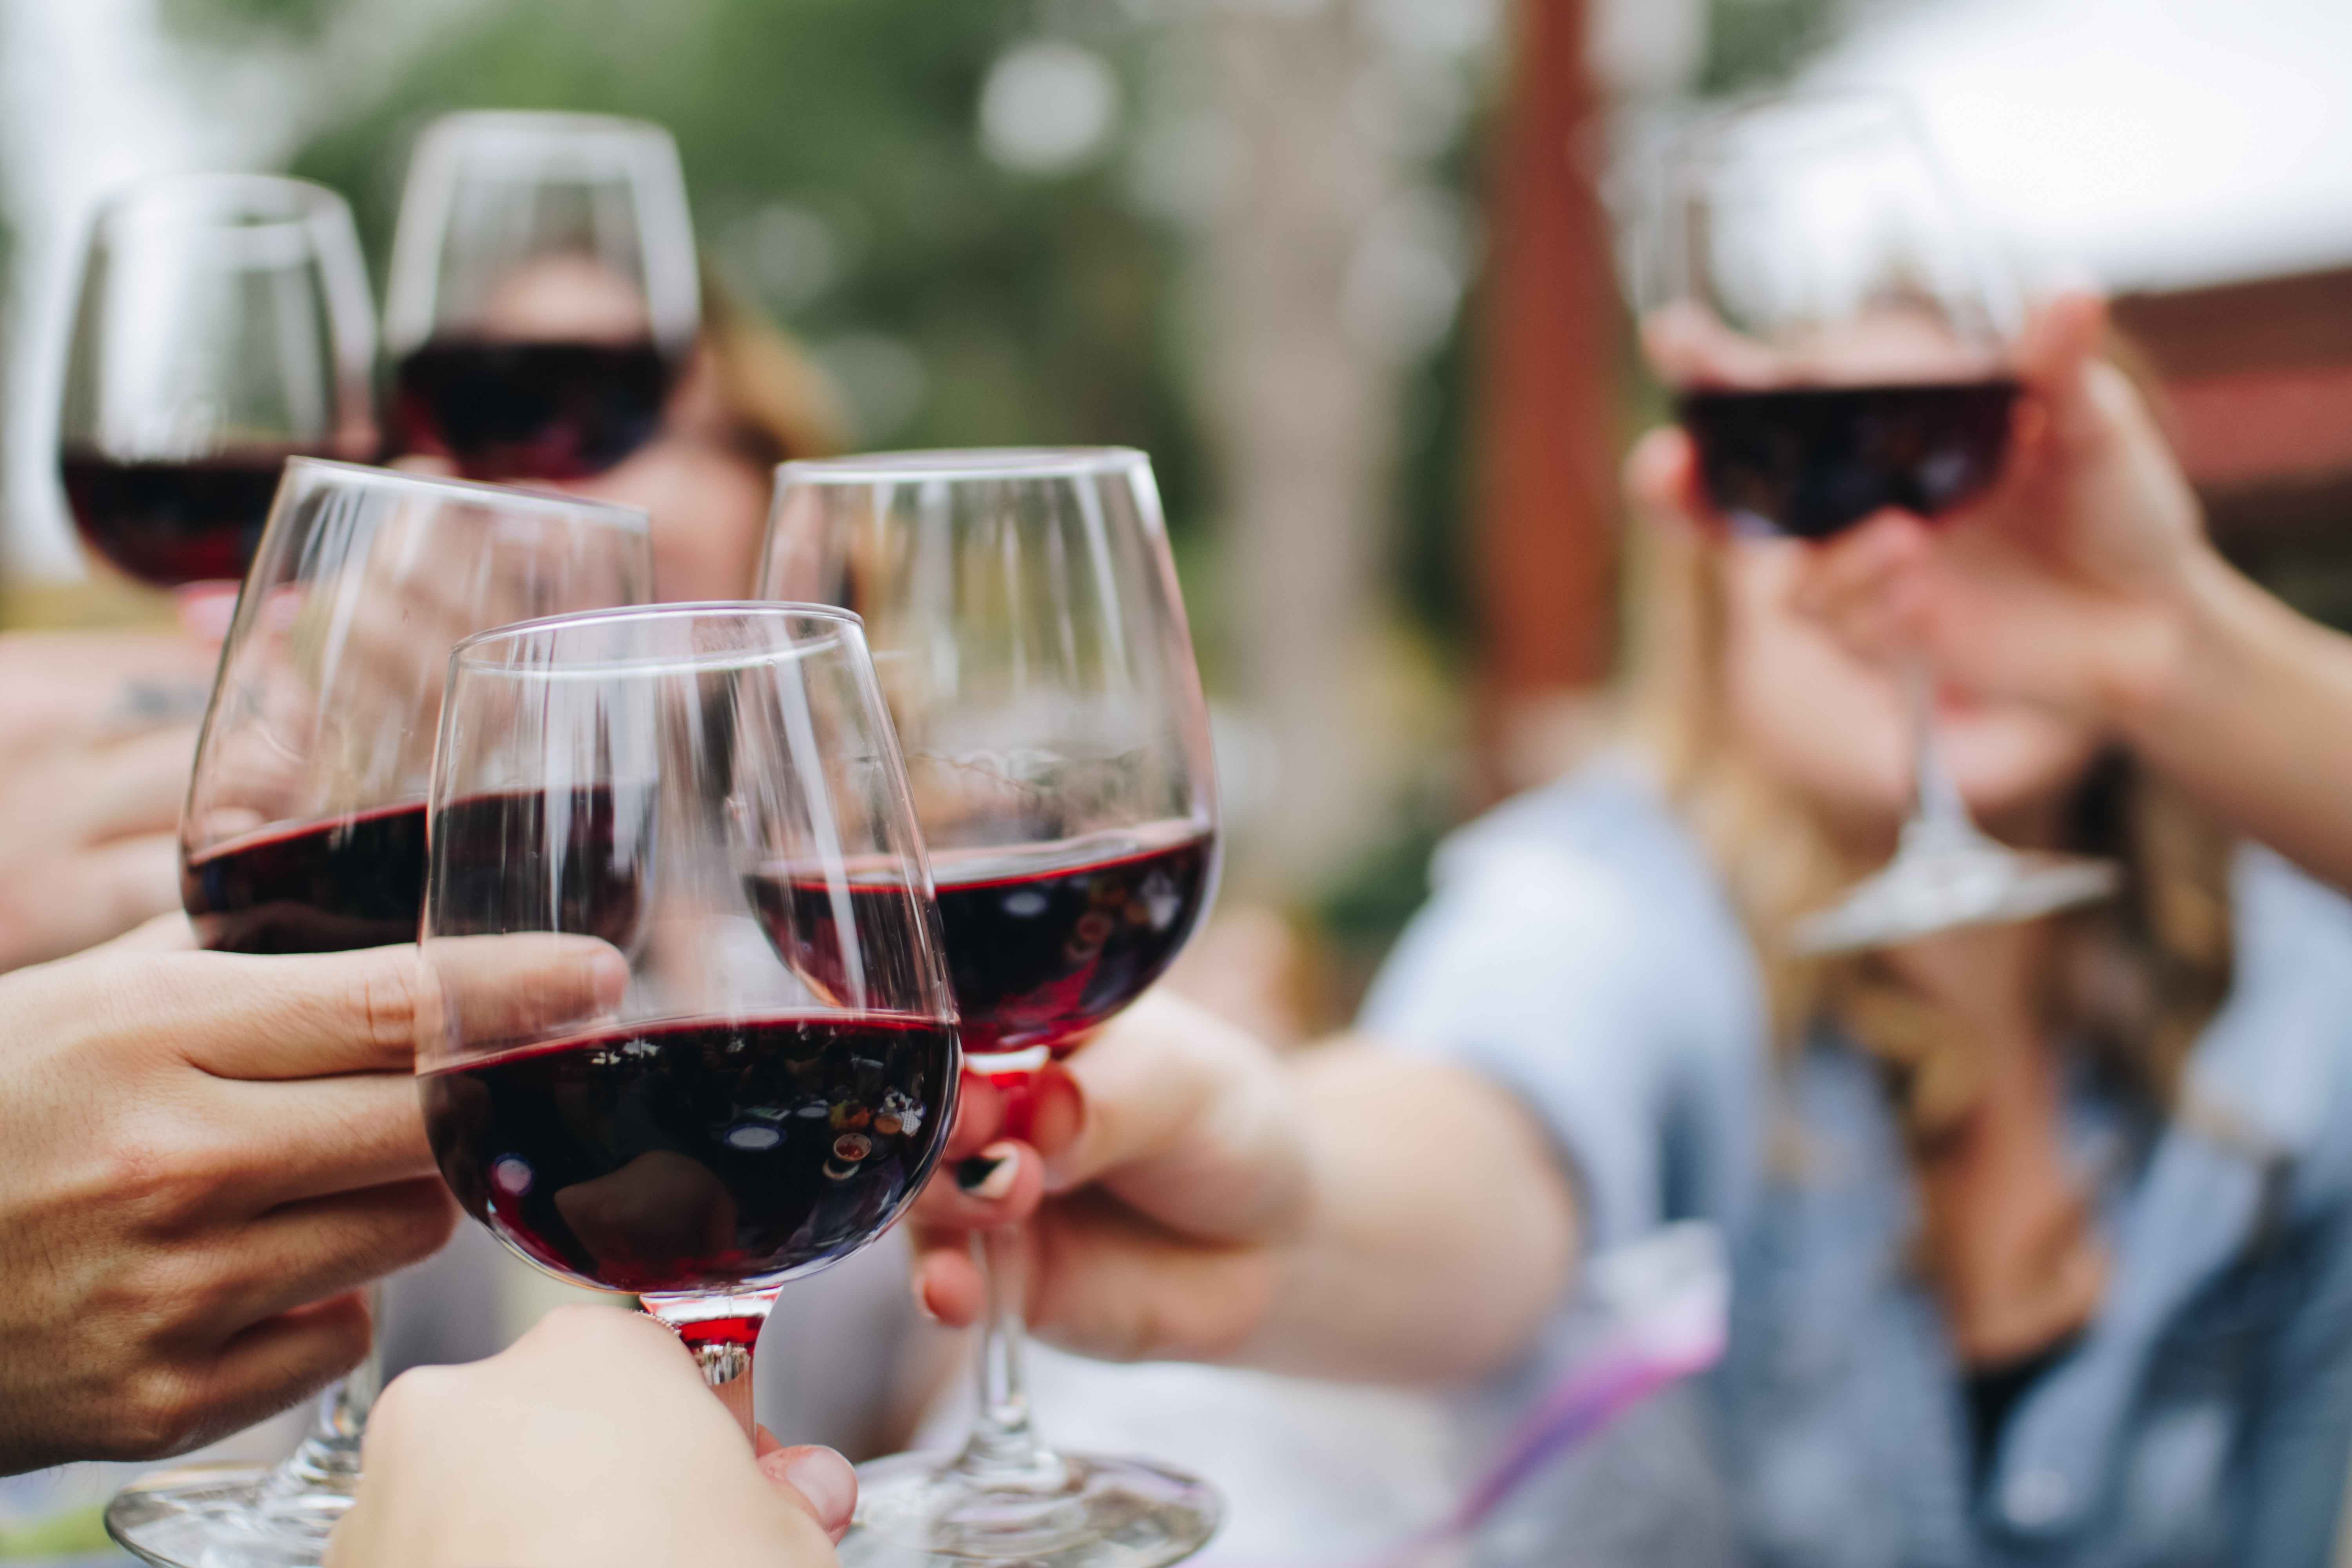

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

In [ ]:
data_wine= pd.read_csv("winequality-red.csv")
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data_wine.shape

(1599, 12)

In [ ]:
data_wine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# **EDA**

In [ ]:
corr = data_wine.corr()

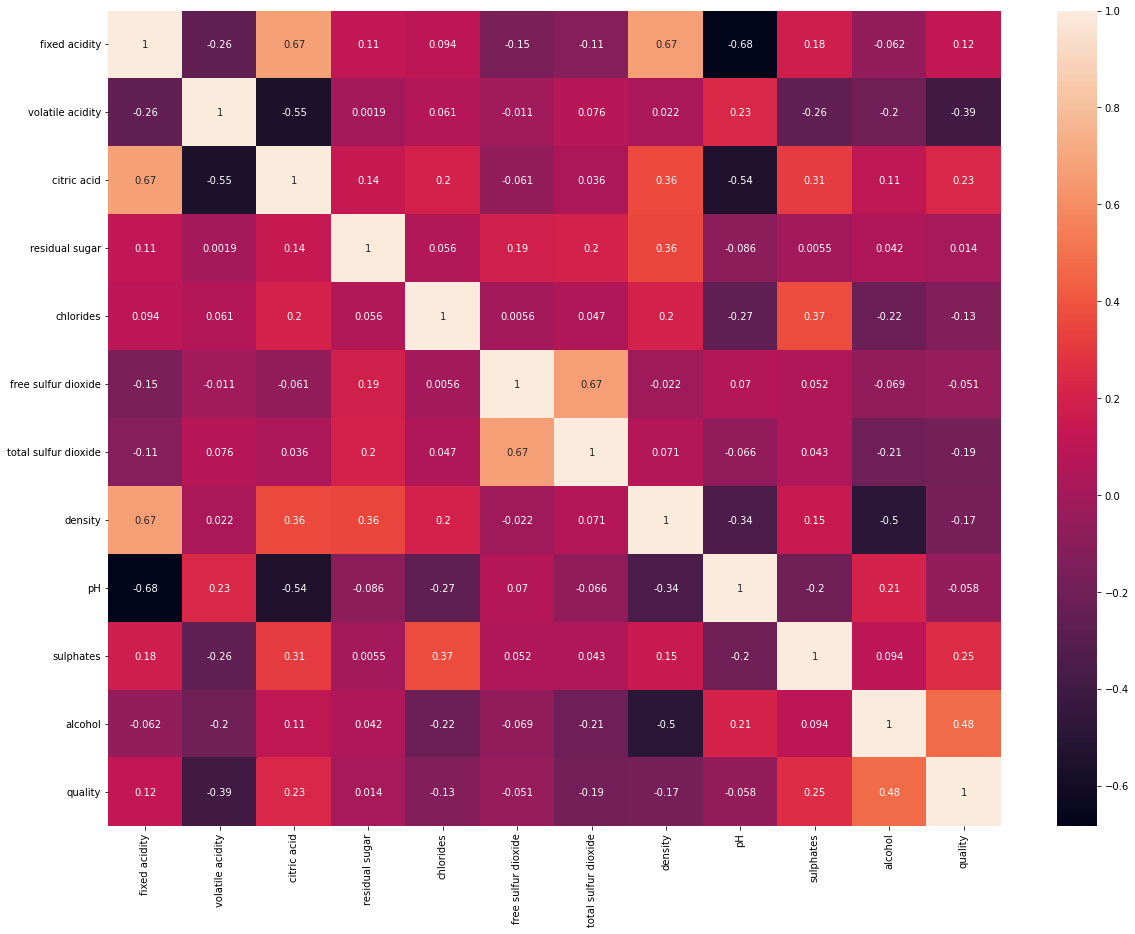

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [ ]:
data_wine=data_wine.drop(['pH', 'residual sugar','free sulfur dioxide'], axis=1)
data_wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


Mengecek keberadaan data outliers

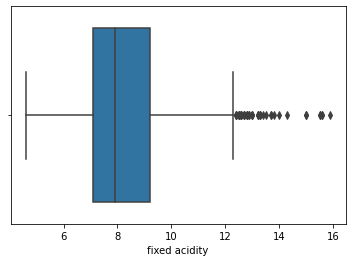

In [ ]:
sns.boxplot(x=data_wine["fixed acidity"])

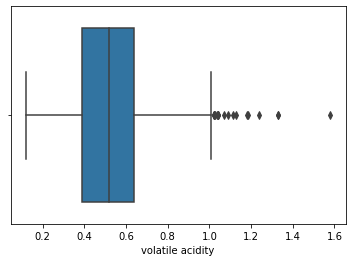

In [ ]:
sns.boxplot(x=data_wine["volatile acidity"])

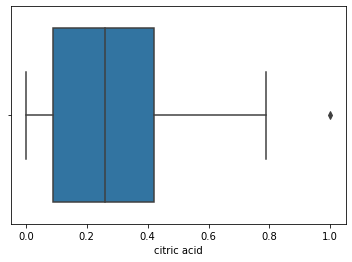

In [ ]:
sns.boxplot(x=data_wine["citric acid"])

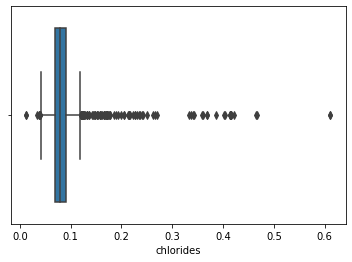

In [ ]:
sns.boxplot(x=data_wine["chlorides"])

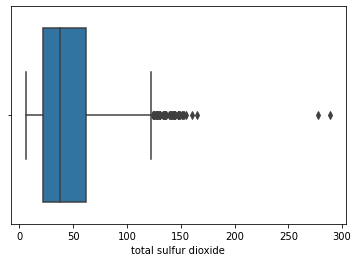

In [ ]:
sns.boxplot(x=data_wine["total sulfur dioxide"])

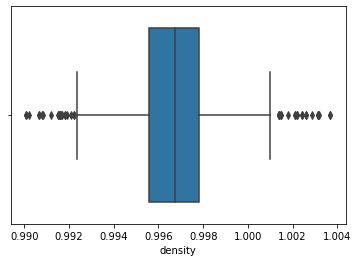

In [ ]:
sns.boxplot(x=data_wine["density"])

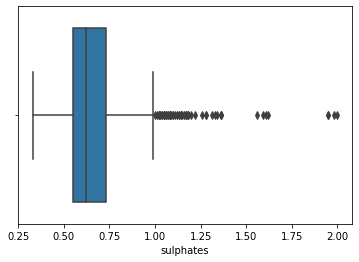

In [ ]:
sns.boxplot(x=data_wine["sulphates"])

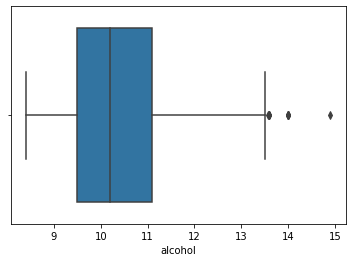

In [ ]:
sns.boxplot(x=data_wine["alcohol"])

In [ ]:
#delete outliers data
data_wine = data_wine[(np.abs(stats.zscore(data_wine)) < 3).all(axis=1)]

After deleting data outliers

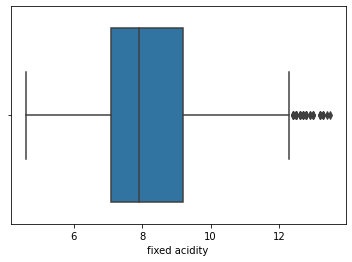

In [ ]:
sns.boxplot(x=data_wine["fixed acidity"])

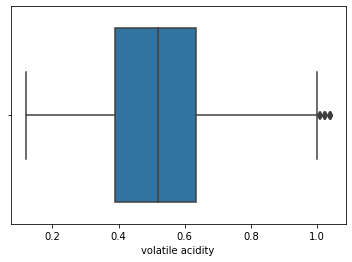

In [ ]:
sns.boxplot(x=data_wine["volatile acidity"])

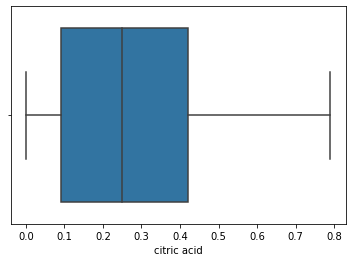

In [ ]:
sns.boxplot(x=data_wine["citric acid"])

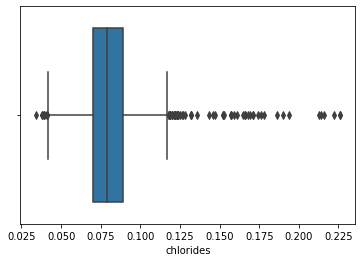

In [ ]:
sns.boxplot(x=data_wine["chlorides"])

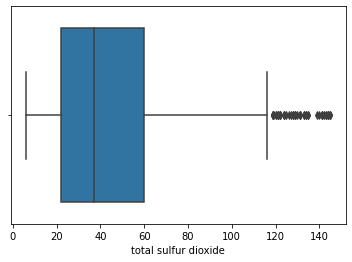

In [ ]:
sns.boxplot(x=data_wine["total sulfur dioxide"])

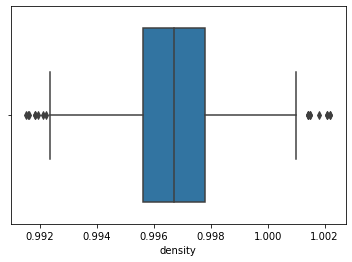

In [ ]:
sns.boxplot(x=data_wine["density"])

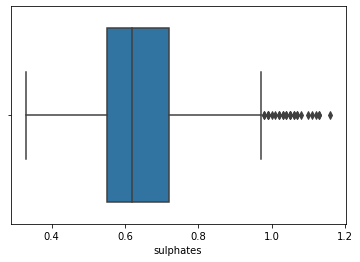

In [ ]:
sns.boxplot(x=data_wine["sulphates"])

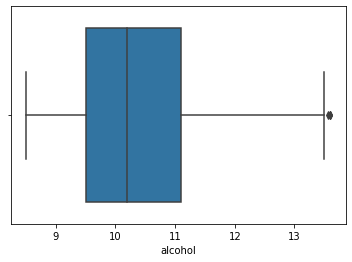

In [ ]:
sns.boxplot(x=data_wine["alcohol"])

# **Labelling**

In [ ]:
data_wine['label'] = [1 if wine_quality >= 7 else 0 for wine_quality in data_wine['quality']]

In [ ]:
data_wine.sample(20)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,label
1504,7.5,0.380,0.57,0.106,12.0,0.99605,0.55,11.4,6,0
846,6.4,0.640,0.21,0.081,31.0,0.99689,0.66,9.8,5,0
375,11.5,0.540,0.71,0.124,15.0,0.99840,0.83,11.8,7,1
974,8.8,0.330,0.41,0.073,13.0,0.99658,0.62,12.1,7,1
529,9.9,0.630,0.24,0.077,33.0,0.99740,0.57,9.4,5,0
21,7.6,0.390,0.31,0.082,71.0,0.99820,0.65,9.7,5,0
481,9.4,0.300,0.56,0.080,17.0,0.99640,0.92,11.7,8,1
186,7.4,0.390,0.48,0.082,67.0,0.99720,0.55,9.2,5,0
252,11.1,0.350,0.48,0.090,21.0,0.99860,0.53,10.5,5,0
1102,6.1,0.480,0.09,0.078,30.0,0.99402,0.54,11.2,6,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


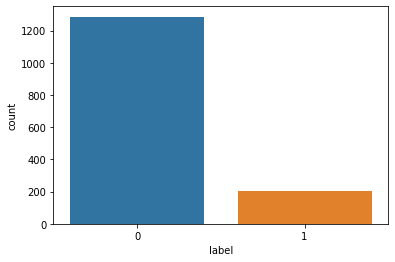

In [ ]:
sns.countplot(data_wine['label'])

In [ ]:
#upsampling
df_majority = data_wine[data_wine["label"]==0]
df_minority = data_wine[data_wine["label"]==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
data_wine = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
data_wine["label"].value_counts()

1    1286
0    1286
Name: label, dtype: int64

In [ ]:
data_wine=data_wine.drop(['quality'],axis = 1)

In [ ]:
data_wine

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,label
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,0
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,0
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,0
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,0
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...
369,9.4,0.270,0.53,0.074,18.0,0.99620,1.13,12.0,1
997,5.6,0.660,0.00,0.087,11.0,0.99378,0.63,12.8,1
1035,10.1,0.370,0.34,0.085,17.0,0.99683,0.65,10.6,1
488,11.6,0.320,0.55,0.081,67.0,1.00020,0.92,10.8,1


# **Find the right model**
Binary Classification

In [ ]:
X = data_wine.drop('label', axis = 1)
y = data_wine['label']

In [ ]:
data_wine = data_wine.reset_index()

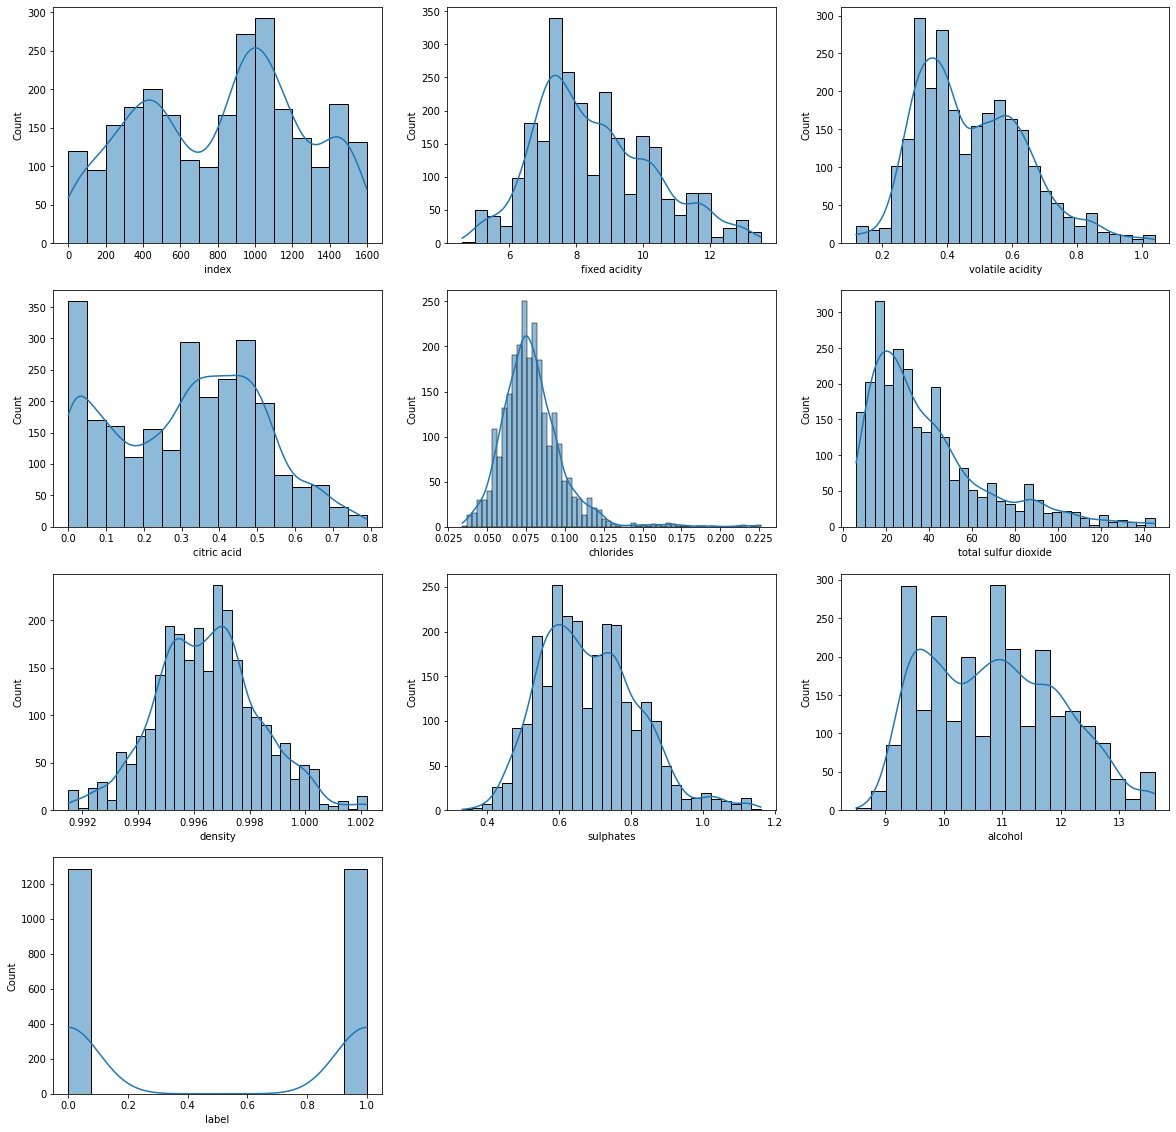

In [ ]:
plt.figure(figsize = (20,20))
for i,col in enumerate(data_wine.columns):
    plt.subplot(4,3,i+1)
    sns.histplot(x = col, kde = True, data = data_wine)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

#perfomance of model
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       385
           1       0.95      0.99      0.97       387

    accuracy                           0.97       772
   macro avg       0.97      0.97      0.97       772
weighted avg       0.97      0.97      0.97       772



In [ ]:
print(confusion_matrix(y_test, pred_rfc))

[[364  21]
 [  4 383]]


SVM

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

#perfomance of model
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       385
           1       0.82      0.89      0.86       387

    accuracy                           0.85       772
   macro avg       0.85      0.85      0.85       772
weighted avg       0.85      0.85      0.85       772



In [ ]:
print(confusion_matrix(y_test, pred_svc))

[[311  74]
 [ 42 345]]


Stochastic Gradient Decent

In [ ]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

#perfomance of model
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       385
           1       0.83      0.75      0.79       387

    accuracy                           0.80       772
   macro avg       0.80      0.80      0.79       772
weighted avg       0.80      0.80      0.79       772



In [ ]:
print(confusion_matrix(y_test, pred_sgd))

[[324  61]
 [ 97 290]]


Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

#perfomance of model
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       385
           1       0.78      0.83      0.81       387

    accuracy                           0.80       772
   macro avg       0.80      0.80      0.80       772
weighted avg       0.80      0.80      0.80       772



In [ ]:
print(confusion_matrix(y_test, pred_clf))

[[296  89]
 [ 66 321]]
